# **Credit Default Payment Prediction Algorithm with Machine Learning**

![](https://images.unsplash.com/photo-1589758438368-0ad531db3366?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1932&q=80)






## Introduction:
Credit default remains a significant concern within the financial landscape, impacting businesses and individuals alike. Timely prediction of credit default holds the potential to mitigate financial risks and optimize lending decisions. This report is centered around developing a machine learning-driven framework for credit default prediction based on relevant financial attributes. The objective is to construct an accurate and efficient system capable of assisting financial institutions in evaluating the likelihood of credit default. By analysing a range of financial parameters, this study aims to forecast whether a credit applicant is prone to defaulting, employing a suite of machine learning classification models including Logistic Regression, Decision Trees, Random Forest, and more.

## 1) Importing the necessary libraries 

In [1]:
# Importing the necessary libraries
import jovian
import opendatasets as od
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

<IPython.core.display.Javascript object>


### 0 ) Downloading Dataset
We will use a wrapper to download the dataset at Kaggle using `opendatasets`. [Click here for more details](https://github.com/JovianML/opendatasets/blob/master/README.md#kaggle-credentials) But you will need to provide the account information on Kaggle to download data.

- First, you register an account on Kaggle if you haven't. 

- Second, you can get your API key on the account page. 

- Third, you come back to this notebook and fill in with the account information (Username&API key at Kaggle) to download **'Give Me Some Credit'** dataset when the input pop up

In [2]:
dataset_url = "https://www.kaggle.com/c/GiveMeSomeCredit/discussion?sort=votes"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading GiveMeSomeCredit.zip to .\GiveMeSomeCredit


100%|██████████| 5.16M/5.16M [00:02<00:00, 2.43MB/s]



Extracting archive .\GiveMeSomeCredit/GiveMeSomeCredit.zip to .\GiveMeSomeCredit


In [3]:
# Let's load the training dataset using pandas library
train_df = pd.read_csv('GiveMeSomeCredit/cs-training.csv')
train_df.head() 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# Let's do the same for test dataset using the same pandas library
test_df = pd.read_csv('GiveMeSomeCredit/cs-test.csv')
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## 2) Why Machine Learning for this problem?
**Data-Driven Decision Making**: Machine learning algorithms analyze historical data to identify patterns and relationships that humans might not be able to discern. This enables lenders to make more informed and data-driven decisions about credit approvals and risk assessment.

**Accuracy Improvement**: Machine learning models have the potential to outperform traditional rule-based approaches in predicting credit default. They can capture complex interactions between variables and learn from large amounts of data.

**Risk Assessment**: Machine learning models provide a more comprehensive and detailed assessment of an applicant's creditworthiness. They consider multiple factors beyond credit scores, such as income, employment history, payment behavior, and more.

**Early Detection of Default Risk**: Machine learning algorithms can identify potential default risks earlier in the process. This allows lenders to take preventive measures, such as offering financial counseling or adjusting credit terms, to mitigate the risk.

**Personalization**: Machine learning models can tailor credit decisions to individual customers. They can create personalized risk profiles that consider an applicant's unique characteristics and financial history, leading to more accurate assessments.

## 3) Project Overview:

![](https://i.imgur.com/yyPB1G5.jpg)

In this project, we will explore the application of various powerful algorithms to solve problems in the realm of Machine Learning. The algorithms we will be working with are:

- Logistic Regression
- SVM
- KNN
- Decision Trees
- Random Forest
- LightGBM

Each of these algorithms possesses distinct characteristics and is suitable for different types of tasks. By using these algorithms, we aim to create predictive models that can learn patterns and relationships from the provided data.

Throughout the project, we will leverage essential evaluation tools, particularly the Confusion Matrix. The Confusion Matrix allows us to assess the performance of our models in terms of true positives, true negatives, false positives, and false negatives, providing valuable insights into their effectiveness.


## 4) What Is Machine Learning :

*According to Sir Arthur Samuel, Machine learning is a “Field of study that gives computers the ability to learn without being explicitly programmed"*.

![](https://images.unsplash.com/photo-1591453089816-0fbb971b454c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTB8fG1hY2hpbmUlMjBsZWFybmluZ3xlbnwwfHwwfHx8MA%3D%3D&auto=format&fit=crop&w=600&q=60)

## Key Concepts

- **Data-driven Approach:** Machine Learning relies on data to train models and make predictions. It enables computers to learn patterns and relationships within the data.

- **Training and Inference:** The process of developing a Machine Learning model involves training it on labeled data to learn from the patterns. Once trained, the model can make predictions on new, unseen data during inference.

- **Supervised Learning:** In supervised learning, the model is trained using labeled data, where each input example is paired with its corresponding output. The goal is to learn a mapping from inputs to outputs.

- **Unsupervised Learning:** In unsupervised learning, the model is trained on unlabeled data, and it must find patterns and structures within the data without explicit guidance.

- **Semi-Supervised Learning:** This approach combines both labeled and unlabeled data to train the model, often leveraging the unlabeled data to improve the model's performance.

- **Reinforcement Learning:** In reinforcement learning, the model learns from interactions with an environment, receiving rewards or penalties based on its actions.


## Machine Learning Workflow

1. **Data Collection:** Gather relevant data from various sources, such as databases, files, or APIs. Ensure that the data is representative and of sufficient quality for training the model.

2. **Data Preprocessing:** Clean and prepare the data for training. This involves handling missing values, scaling features, and encoding categorical variables.

3. **Train-Test Split:** Divide the data into training and testing sets. The training set is used to train the model, while the testing set evaluates the model's performance on unseen data.

4. **Model Selection:** Choose the appropriate Machine Learning algorithm based on the problem type and data characteristics. Common algorithms include Logistic Regression, Decision Trees, Random Forests, and XGBoost.

5. **Model Training:** Train the selected model using the training data. The model optimizes its internal parameters to minimize the prediction errors.

6. **Model Evaluation:** Evaluate the model's performance using various metrics, such as accuracy, precision, recall, F1-score, mean squared error, etc.

7. **Hyperparameter Tuning:** Fine-tune the model's hyperparameters to improve its performance. This step involves experimenting with different parameter values.

8. **Model Deployment:** Deploy the trained model to make predictions on new, real-world data. This often involves integrating the model into a larger software system or web application.


## Common Evaluation Metrics

- **Confusion Matrix:** A table that helps evaluate the performance of classification models by showing true positives, true negatives, false positives, and false negatives.We will be using this the most today.





## 5) Dataset Description

The dataset is from Kaggle competition, 'Give Me Some Credit' for data science practitioners to train models for the competition. The dataset consists of 150K records about borrowers' credit card use behaviour and basic information. We can see this from the data description given on the website. ( You can also click the folder icon on your left sidebar. there is a folder named `GiveMeSomeCredit` under which you can see the file called 'Data Dictionary.xls'

![](https://i.imgur.com/tQSWU5p.png)


##### a. The Dependent Variable

The dependent variable in our dataset is `SeriousDlqin2yrs`. i.e. the target of an individual experienced 90 days past due default or worse. It is a binary indicator with the value of 1 flagging a default event ( A person did not conduct debt payments over 90 days), 0 otherwise. 



##### b. Independent Variables

On the other hand, input variables in the dataset are two types: basic information about borrowers' age, family, monthly income; credit cards use information such as credit lines, defaulting times within 60-89 days or 30-59 days but not worse (a person did not pay on the date but paid back with a specific time frame), a ratio of the sum of debt payments and living costs to monthly incomes.

## 6) Data Preprocessing

In [5]:
# Now that we are done loading our training and testing dataset we should look more inside our training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

`MonthlyIncome` and `NumberOfDependents` have some missing values which is a problem as these two columns are quite necessary in determining the percentage of credit default.We shall do something about it in upcoming steps

In [6]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
train_df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Now we can see the exact number of missing values from `MonthlyIncome` and `NumberOfDependents` which are a lot i would say considering the kind of model we are working on.

While writing this i've decided to go with the traditional approach and use SimpleImputer from the sklearn library to deal with the missing values.Ofcourse i could've taken other route and filled the missing values using median and mode but that's a topic for some other conversation.My idea is to build this model using pure library way by using the libraries that sklearn provides us with.

In [8]:
# As we have seen above both in train_df and test_df we have columns Unnamed:0.Let's rename it to Id.
data = [train_df,test_df]
for df in data:
    df.drop(columns={'Unnamed: 0'},inplace=True)

In [9]:
# Now let's go over the columns in train_df that have missing values and impute those missing values using SimpleImputer.
cols_with_missing_values = ['MonthlyIncome','NumberOfDependents']
imputer = SimpleImputer(strategy='mean')
train_df[cols_with_missing_values] = imputer.fit_transform(train_df[cols_with_missing_values])

In [10]:
# Lets check if the missing values are imputed or not 
train_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [11]:
# While we are at it let's do the same thing for our test_df as well because having null values in the test dataset will pose us problems. 
cols_with_missing_values_2 = ['MonthlyIncome','NumberOfDependents']
test_df[cols_with_missing_values_2] = imputer.fit_transform(test_df[cols_with_missing_values_2])

In [12]:
test_df.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

Nice! This worked,now the question may arise why `SeriousDlqin2yrs` wasn't imputed thats because it contains binary values (0s and 1s) not any missing values.

## 7) Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [13]:
# Here we will manipulate the train_df and test_df to suit our model.We will drop SeriousDlqin2yrs column as it is the target column and we wan our model to be better
X_train_data = train_df.drop('SeriousDlqin2yrs',axis=1)
y_train_data = train_df['SeriousDlqin2yrs']

X_test_data = test_df.drop(['SeriousDlqin2yrs'],axis=1)
y_test_data = test_df['SeriousDlqin2yrs']

In [14]:
X_train,X_val,y_train,y_val = train_test_split(X_train_data,y_train_data,test_size = 0.33,random_state=42)

## 8) Logistic Regression
Logistic Regression is a supervised machine learning algorithm which is mainly used for `classification` tasks where the goal is to predict the probability that an instance of belonging to a given class.It's referred as regression because it takes the ouput of the `LinearRegression` function as input and uses a sigmoid function to estimate the probability for a given class.
The sigmoid function is a mathematical function used to map the predicted values to probabilities. In LogisticRegression,instead of fitting a straight line ,we fit an 'S' shaped logistic function,which predicts two maximum values i.e 0 or 1.The curve from indicates the likelihood of something like in our case if a person will default on his payment or not. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [15]:
# Create a LogisticRegression model with 'liblinear' solver
model = LogisticRegression(solver='liblinear')

# Fit the model on training data 
model.fit(X_train,y_train)

# Predict on the training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test_data)

# Calculate accuracy scores for training and validation
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)
# Calculate F1 score, Recall, and Precision for validation set
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

# Create a dictionary for the results
results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy','F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy,f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+----------------------+
|       Metric        |        Value         |
+---------------------+----------------------+
|   Train Accuracy    |  0.9334825870646766  |
| Validation Accuracy |  0.9347474747474748  |
|      F1 Score       | 0.06809001731102135  |
|       Recall        | 0.036274208422994156 |
|      Precision      |  0.5539906103286385  |
+---------------------+----------------------+


The F1,Recall,Precision scores are low and aren't impressive this may indicate overfitting.We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [16]:
# Helper Function to Predict and Plot Confusion Matrix
def predict_and_plot(inputs, targets, model, name=''):
    """
    Predicts using the model, calculates accuracy, plots a confusion matrix, and returns predictions.
    
    Args:
        inputs (array-like): Input data for prediction.
        targets (array-like): True target values.
        model (object): The trained machine learning model.
        name (str): Optional name or label for the model.
        
    Returns:
        preds (array-like): Predicted target values.
    """
    # Make predictions using the provided model
    preds = model.predict(inputs)
    
    # Calculate and display accuracy
    accuracy = accuracy_score(targets, preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Generate and plot the confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Confusion Matrix')
    
    # Return the predicted values
    return preds


Accuracy: 93.35%


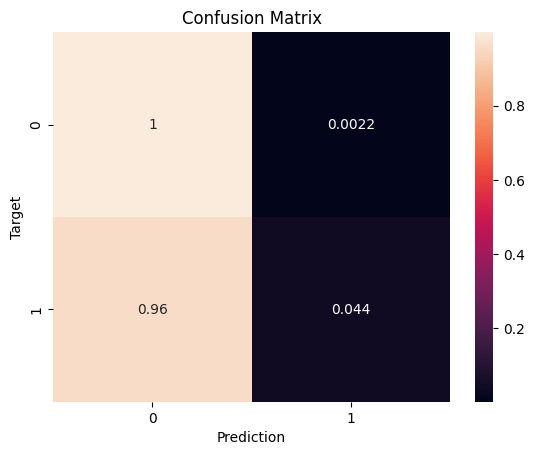

In [17]:
train_preds = predict_and_plot(X_train,y_train,model,'LogisticRegression')

Accuracy: 93.47%


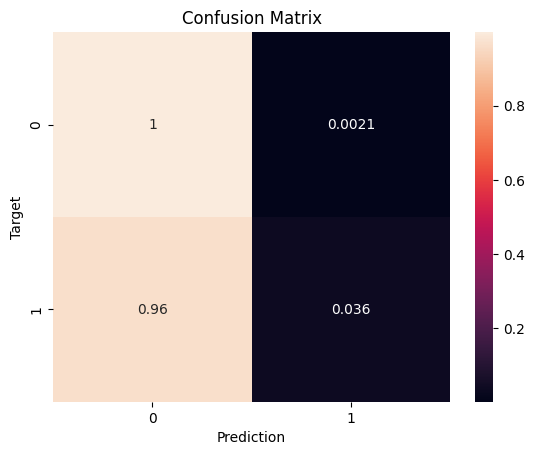

In [18]:
val_preds = predict_and_plot(X_val,y_val,model,'LogisticRegression')

The validation accuracy is around 93.42% this suggests that our model generalizes well on the data it hasn't seen before.But a question may arise how good is 93.42% accuracy? To tackle this let's create a random model that will guess randomly.

In [19]:
def random_inputs(num_samples):
    return np.random.randint(2, size=num_samples)  # Generate random 0s and 1s

random_preds = random_inputs(len(X_val))  # Generating random predictions for the validation set
random_accuracy = accuracy_score(y_val, random_preds)
print(f"Random Model Accuracy: {random_accuracy * 100:.2f}%")


Random Model Accuracy: 49.88%


Thankfully, our model is better than a "random" model! 

## 9) Linear Support Vector Classification
Support vector Machine (SVM) is a supervised machine learning algorithm used both for classification and regression.Though we say regression problem it's best suited for classification.LinearSVC is used to separate data into different classes by finding a hyperplane that best separates the classes in a linearly separable dataset. It aims to find a decision boundary that maximizes the margin between the classes while minimizing classification error. The "linear" in LinearSVC refers to the fact that it constructs linear decision boundaries. Let's consider two independent variables x1,x2 and one dependent variable which is either a blue circle or a red circle.

How does SVM work?
One reasonable choice as the best hyperplane is the one that represents the largest separation of margin b/w two classes.

![](https://media.geeksforgeeks.org/wp-content/uploads/20201211181531/Capture.JPG)

So we choose the hyperplane whose distance from it to the nearest data point on each side is maximized.If such a hyperplane exists it is known as maximum-margin hyperplane/hard margin.So from the above figure,we choose L2.Let's consider one more scenario,here we have one blue ball in the boundary of the red ball.So how does SVM classify the data? Well thats the power of SVM the blue ball in the boundary of red ones in an outlier.The SVM algorithm has the power to ignore the outlier and finds the best hyperplane that maximizes the margin.SVM is robust to outliers.
![](https://media.geeksforgeeks.org/wp-content/uploads/20201211191138/Capture.JPG)

In [20]:
# Create a LinearSVC model
model = LinearSVC()

# Fit the model on the training data
model.fit(X_train,y_train)
# Predict on the training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate accuracy scores for training and validation
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

# Calculate F1 score, Recall, and Precision for validation set
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

# Print the validation metrics
results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


c:\Users\yeagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


+---------------------+----------------------+
|       Metric        |        Value         |
+---------------------+----------------------+
|   Train Accuracy    |  0.9330746268656717  |
| Validation Accuracy |  0.9344040404040405  |
|      F1 Score       | 0.026970332634102485 |
|       Recall        | 0.013833384568090993 |
|      Precision      |  0.5357142857142857  |
+---------------------+----------------------+


c:\Users\yeagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The scores are real bad well i guess LinearSVC isn't a good choice for training the kind of model we are hoping so we'll be moving forward leaving it as it is here.

## 10) K Nearest Neighbors(KNN)
K-Nearest Neighbors is a simple yet powerful supervised machine learning algorith used for both classification and regression tasks.It's considered a non-parametric and instance based learning algorithm.KNN makes predictions by finding K data points in the training set that are closest to to a new input data point and using their labels or values to make predictions.

![](https://i.imgur.com/1C1Uhnr.png)

1) **Training Phase** - During the training phase,KNN memerizes the entire training dataset.This means that KNN doesn't learn explicit parameters or create a model in traditional sense.It stores the training data as-is.
2) **Prediction Phase** - Given a new input data,KNN identifies the K closest data points from the training set based on a distance metric.The distance can be calculated using different methods,but Euclidean distance is commonly used.It measures the straight line distance b/w two points in a multi-dimensional space.Once the K nearest neighbors are identified, the algorithm looks at their class labels. For classification, the majority class among these K neighbors becomes the predicted class for the new input point.
3) **Choosing the Value of K** - The optimal value of K can depend on the nature of the data and the problem at hand. It's typically chosen using techniques like cross-validation.



In [21]:
# Create a KNN model
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train,y_train)

# Predict on the training and validation sets\
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate accuracy scores for training and validation
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

# Calculate F1 score,Recall,and Precision for Validation set
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

# Print the validation metrics
result = {
    'Metric': ['Train Accuracy','Validation Accuracy','F1 Score','Recall','Precision'],
    'Value': [train_accuracy,val_accuracy,f1,recall,precision]
}

# Create a dataframe from the results dictionary
result_df = pd.DataFrame(results)
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+----------------------+
|       Metric        |        Value         |
+---------------------+----------------------+
|   Train Accuracy    |  0.9330746268656717  |
| Validation Accuracy |  0.9344040404040405  |
|      F1 Score       | 0.026970332634102485 |
|       Recall        | 0.013833384568090993 |
|      Precision      |  0.5357142857142857  |
+---------------------+----------------------+


Accuracy: 93.51%


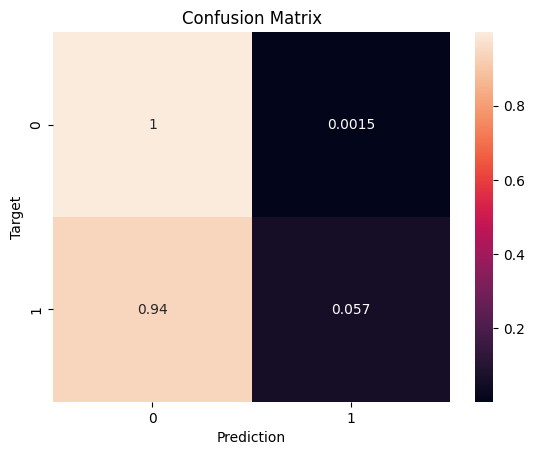

In [22]:
train_preds = predict_and_plot(X_train,y_train,model,'KNN')

Accuracy: 93.32%


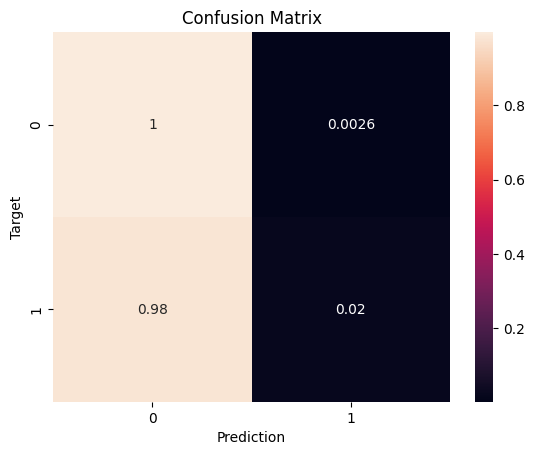

In [23]:
val_preds = predict_and_plot(X_val,y_val,model,'KNN')

In [24]:
#Lets compare this with our random model
random_preds = random_inputs(len(X_val))
random_accuracy = accuracy_score(y_val,random_preds)
print(f"Random Model Accuracy: {random_accuracy * 100:.2f}%")


Random Model Accuracy: 49.81%


Again thankfully our KNN model is working far better than this random model

## 11) Decision Trees
![](https://miro.medium.com/v2/resize:fit:1358/1*66sc9FlgC3C8Bv7wg5YxmA.png)




**Quote**
>“The 'knowledge' learned by a decision tree through training is directly formulated into a hierarchical structure. This structure holds and displays the knowledge in such a way that it can easily be understood, even by non-experts.”




Decision trees are supervised machine learning algorithms that solve classification and regression problems. A decision tree is constructed by learning a sequence of **If-Else conditions** about individual features to divide the training data into subsets and eventually infer the label. One of the significant differences from linear models is that tree-based models can capture non-linear relationships between features and labels. In addition, input features to be on the same scale through standardization is unnecessary.




- **Node** : A node is a point that involves either a question or a prediction. Those questions are if-else statements in order to split data till the end where a decision tree made predictions for the label.

- **Root** : The root is an initial node at which the tree starts growing. The root node has no parent node, and it involves a question that generates two children nodes through two branches. 

- **Internal Node**: An internal node is a node that not only has a parent, but also gives rise to two children nodes.

- **Leaf** : A leaf is a node that has one parent node but no children node involving no questions. It's where a prediction for an entry is made. The ultimate goal of a decision tree is to produce the purest leaves.

- **max_depth**: In a decision tree, the parameter controls the maximum number of branches to be separated the top (root nodes)from an extreme-end (the leaf). It's a parameter for the `DescirionTreeClassifer()` estimator. It means the number of times for a decision model to split data. The above diagram splits the entire dataset twice so that the `max_depth` is equal to 2. 



In [25]:
# Create a DecisionTree model
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train,y_train)

# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate accuract scores for training and validation
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

# Calculate F1 score,Recall and Precision for the validatio set
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

# Create a dictionary for the results
results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+---------------------+
|       Metric        |        Value        |
+---------------------+---------------------+
|   Train Accuracy    | 0.9997114427860696  |
| Validation Accuracy |  0.897979797979798  |
|      F1 Score       | 0.27023121387283233 |
|       Recall        | 0.2874269904703351  |
|      Precision      | 0.25497682028906465 |
+---------------------+---------------------+


In [26]:
pd.value_counts(train_preds)

0    93754
1     6746
dtype: int64

In [27]:
model.tree_.max_depth

39

.max_depth() is 38 that means the classifier we created splitted the entire dataset 38 times to produce a leaf(the prediction)

## Visualizing the Decision Tree

[Text(0.5, 0.875, 'NumberOfTimes90DaysLate <= 0.5\ngini = 0.126\nsamples = 100500\nvalue = [93727, 6773]'),
 Text(0.25, 0.625, 'RevolvingUtilizationOfUnsecuredLines <= 0.55\ngini = 0.089\nsamples = 94868\nvalue = [90448, 4420]'),
 Text(0.125, 0.375, 'NumberOfTime30-59DaysPastDueNotWorse <= 0.5\ngini = 0.048\nsamples = 73408\nvalue = [71607, 1801]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NumberOfTime60-89DaysPastDueNotWorse <= 0.5\ngini = 0.214\nsamples = 21460\nvalue = [18841, 2619]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'NumberOfTimes90DaysLate <= 1.5\ngini = 0.486\nsamples = 5632\nvalue = [3279, 2353]'),
 Text(0.625, 0.375, 'RevolvingUtilizationOfUnsecuredLines <= 0.517\ngini = 0.446\nsamples = 3539\nvalue = [2352, 1187]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumberOfTime60-89DaysPastDueNotWorse <= 0.5

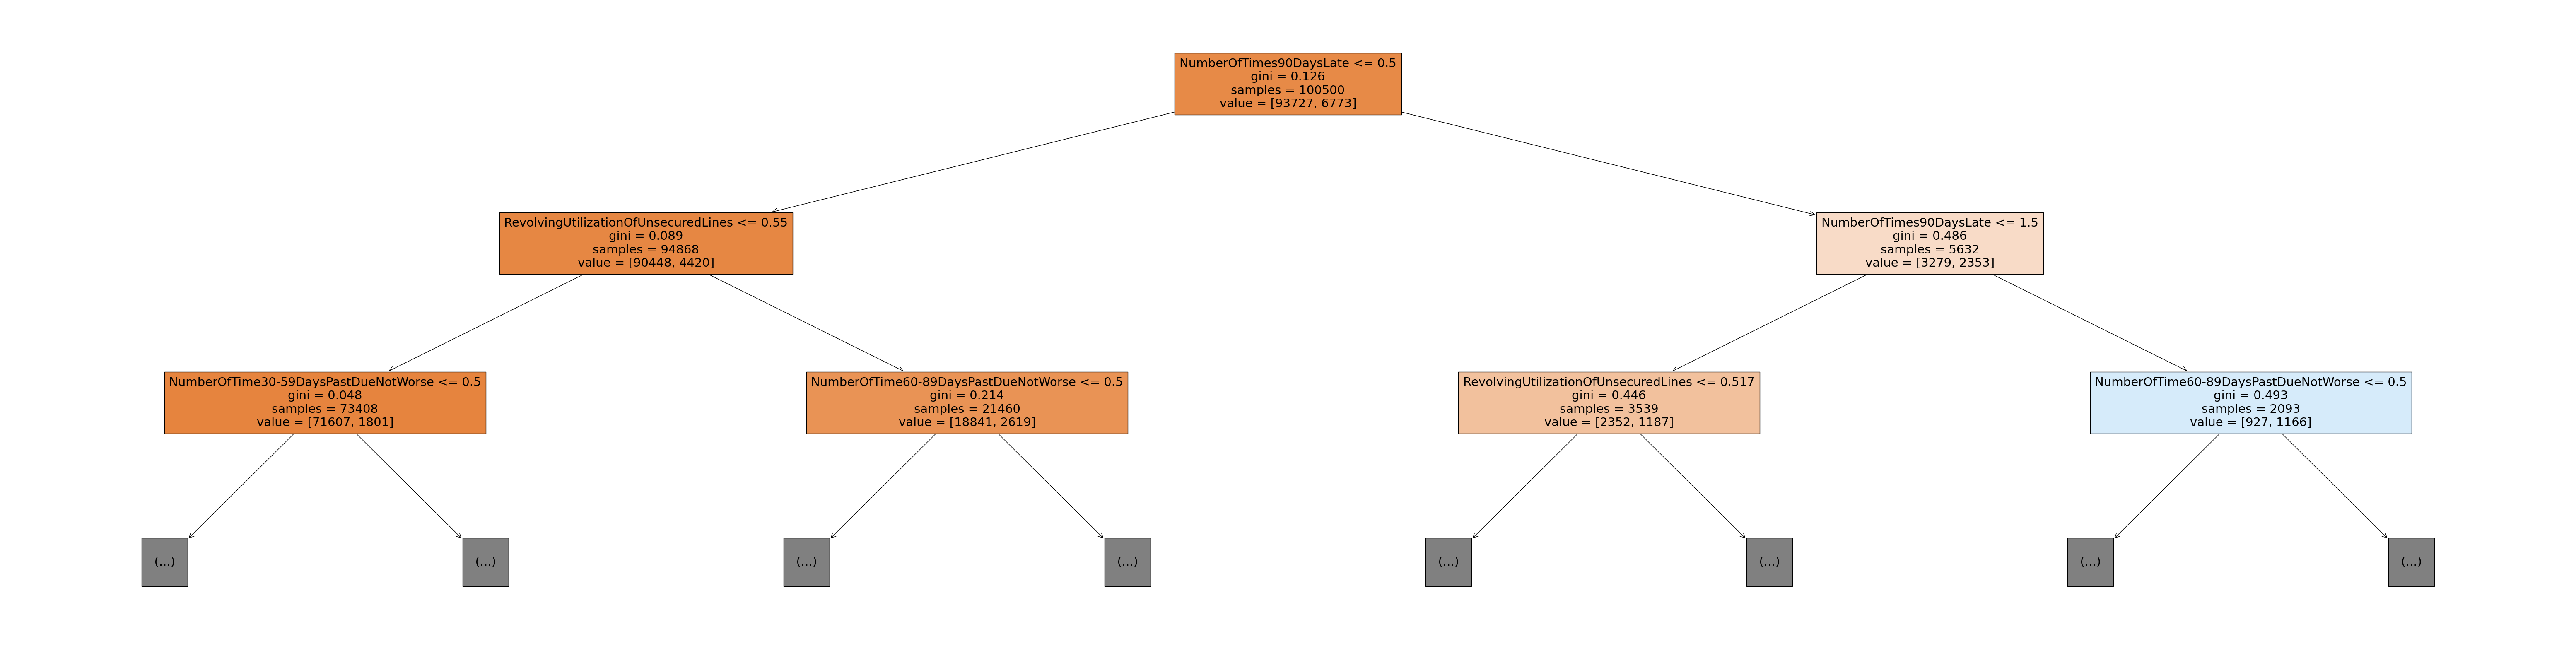

In [28]:
from sklearn.tree import plot_tree,export_text
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns.tolist(),max_depth=2,filled=True)

####  Decision Tree Plot Explained

##### `NumberOfTimes90DaysLate <= 0.5`

The root node is at the topmost, which using the feature`NumberOfTimes90DaysLate` to split the dataset, and the split point is 0.5, meaning that the tree asks a question if an observation's data for the feature is smaller than or equal to 0.5, then each observation either goes to the `True` branch or the`False` branch.

##### `gini =0.126`

The Gini score is a metric to evaluate the purity of a node or a leaf. In general, the smaller the Gini score is, the pure the node or leaf can be. The `gini =0` means the node is pure, indicating that the node only contains a single class of samples. 

##### `value = [93727, 6773]`

At the top node, the total number of samples is 100,500 in the `train_inputs`. Then, we can look at the list `value =[93727, 6773]`. 

out of 100,500 samples, 932,727  fall into class 0. This dataset means they did not default the credit payment. Otherwise, 6,773 are designated class 1, indicating that they defaulted the credit payment.



At each node, the tree model would pick up one feature by computing the Gini index to gain the smallest value of the Gini index or computing information gain.

Accuracy: 99.97%


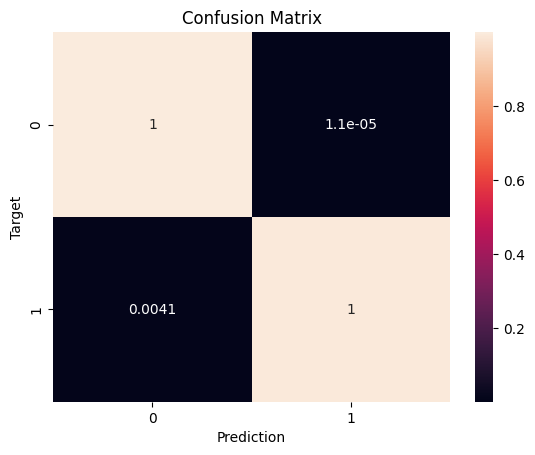

In [29]:
train_preds = predict_and_plot(X_train,y_train,model,'DecisionTree')

Accuracy: 89.80%


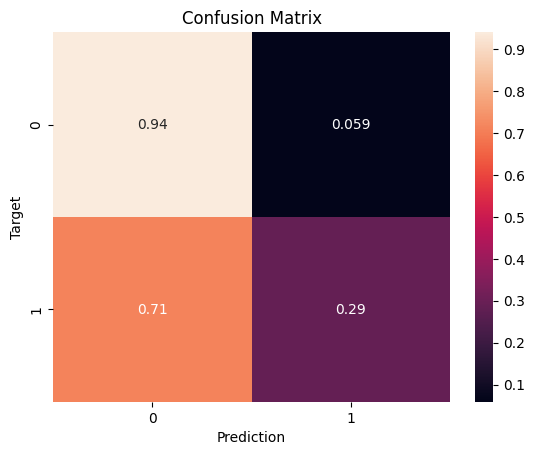

In [30]:
val_preds = predict_and_plot(X_val,y_val,model,'DecisionTree')

## 12) Random Forest
Random Forest is a supervised machine learning algorithm used for classification,regression and other tasks using decision trees.The random forest classifier creates a set of decision trees from a randomly selected subset of training set.It is basically a subset of decision trees from a randomly selected subset of the training set and then it collectes the votes from different decision trees to decided the final prediction.
A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">

In [31]:
# Create a DecisionTree model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train,y_train)

# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate accuract scores for training and validation
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

# Calculate F1 score,Recall and Precision for the validatio set
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

# Create a dictionary for the results
results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+---------------------+
|       Metric        |        Value        |
+---------------------+---------------------+
|   Train Accuracy    | 0.9996517412935323  |
| Validation Accuracy |  0.936989898989899  |
|      F1 Score       | 0.28577971147240666 |
|       Recall        | 0.19182293267752842 |
|      Precision      | 0.5601436265709157  |
+---------------------+---------------------+


Once again the training accuracy is 100% but the validation accuracy is far better this time,far better than the best single decision tree we have trained so far

Accuracy: 99.97%


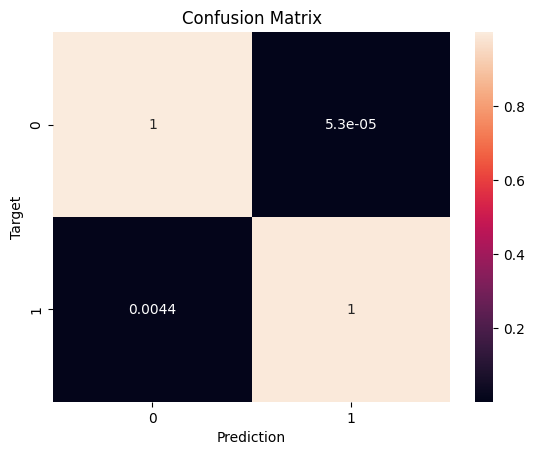

In [32]:
# Let's visualzie confusion matrix for this as well
train_preds = predict_and_plot(X_train,y_train,model,'RandomForestClassifier')

Accuracy: 93.70%


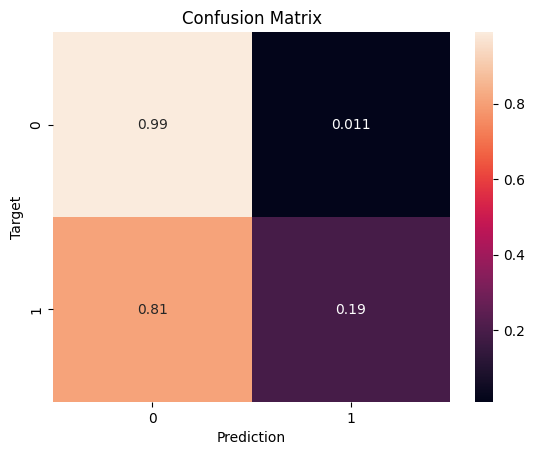

In [33]:
val_preds = predict_and_plot(X_val,y_val,model,'RandomForestClassifier')

## 13) LightGBM Ensemble
Light Gradient Boosted Machine, or LightGBM for short, is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

LightGBM extends the gradient boosting algorithm by adding a type of automatic feature selection as well as focusing on boosting examples with larger gradients. This can result in a dramatic speedup of training and improved predictive performance.

As such, LightGBM has become a de facto algorithm for machine learning competitions when working with tabular data for regression and classification predictive modeling tasks. As such, it owns a share of the blame for the increased popularity and wider adoption of gradient boosting methods in general, along with Extreme Gradient Boosting (XGBoost).

The algorithm starts by creating a single decision tree that predicts the target variable based on the input featuress.It then iteratively adds more decision trees to the model,with each tree attempting to correct the errors of the previous tree.
Lightgbm employes gradient boosting to repeatedly increase the performance of its decision trees.The approach adds a new tree to the modle at each iteration that corrects the flaws of the prior trees.
![](https://miro.medium.com/v2/resize:fit:1400/1*mKkwlQF25Rq1ilne5UiEXA.png)

In [34]:
# Create a LGBMC model
model = lgb.LGBMClassifier()

# Fit the model to the training data
model.fit(X_train,y_train)

# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate accuract scores for training and validation
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

# Calculate F1 score,Recall and Precision for the validatio set
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

# Create a dictionary for the results
results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


[LightGBM] [Info] Number of positive: 6773, number of negative: 93727
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 100500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067393 -> initscore=-2.627442
[LightGBM] [Info] Start training from score -2.627442
+---------------------+---------------------+
|       Metric        |        Value        |
+---------------------+---------------------+
|   Train Accuracy    | 0.9419004975124378  |
| Validation Accuracy | 0.9372121212121212  |
|      F1 Score       |  0.283210332103321  |
|       Recall        | 0.18874884721795265 |
|      Precision      |  0.566943674976916  |
+---------------------+---------------------+


## 14) Hyperparameter and tuning of LightGBM

In [36]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50, 100],  # Varying the number of leaves
    'max_depth': [3, 5, 7],        # Varying the maximum depth
    'learning_rate': [0.01, 0.1],  # Varying the learning rate
    'min_child_samples': [20, 50],  # Varying the minimum child samples
}

# Create the LightGBM model
model = LGBMClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on validation set using the best model
val_preds = best_model.predict(X_val)

# Calculate evaluation metrics
val_accuracy = accuracy_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)
recall = recall_score(y_val, val_preds)
precision = precision_score(y_val, val_preds)

# Create a dictionary for the results
results = {
    'Metric': ['Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


[LightGBM] [Info] Number of positive: 4516, number of negative: 62484
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 67000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067403 -> initscore=-2.627284
[LightGBM] [Info] Start training from score -2.627284


[LightGBM] [Info] Number of positive: 4515, number of negative: 62485
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 67000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 4515, number of negative: 62485
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 67000, number of used features: 10
[LightGBM] [Info

In [37]:
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+---------------------+
|       Metric        |        Value        |
+---------------------+---------------------+
| Validation Accuracy | 0.9385656565656566  |
|      F1 Score       | 0.2919674039580908  |
|       Recall        | 0.19274515831540118 |
|      Precision      | 0.6017274472168906  |
+---------------------+---------------------+


After experimenting with different hyperparameter values using grid search, I observed that the changes in performance were not significantly impactful. Despite trying various combinations, the improvements in accuracy were modest. As a result, I've decided to stick with the current hyperparameter values that consistently yield a strong accuracy of 93.8%.

## 15) Saving the model using Joblib

In [38]:
import joblib
best_model = grid_search.best_estimator_
model_filename = 'webappmodel.joblib'
joblib.dump(best_model,model_filename)

['webappmodel.joblib']

In [39]:
submission = pd.read_csv('GiveMeSomeCredit/sampleEntry.csv')
submission

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [40]:
# Use the best-trained LightGBM model to predict probabilities for the test dataset
predicted_probabilities = best_model.predict_proba(X_test_data)[:, 1]

# Create a DataFrame with predicted probabilities and corresponding IDs
submission['Probability'] = predicted_probabilities

# Save the DataFrame to a CSV file
submission.to_csv('Credit.csv', index=False)

## Kaggle Submission
![Imgur](https://i.imgur.com/WW0wkPh.png)

After reviewing the private leaderboard, I've observed that my current position ranks within the top 13% on the Kaggle leaderboard.

## Summary 
In this project we solved a classification problem with credit card default payment using the 'Give Me Some Credit' at Kaggle.com. With the existing dataset, we learned how to split the dataset into training and validation and submit predictions with the best model using the given test dataset.
We implemented multiple Machine learning algorithms like Logistic Regression,Decision Trees,RandomForest and finally LightGBM.For us LightGBM worked out the best giving us a whoping validation accuracy of 93.87% and landing me in top 13% of the private leaderboard which is something.

**References:**
- Jovian: https://jovian.com/learn/machine-learning-foundations
- Kaggle: https://www.kaggle.com/c/DontGetKicked/data
- Pandas: https://pandas.pydata.org/docs/
- Plotly: https://plotly.com/python/
- Sklearn: https://scikit-learn.org/stable/
- How to Develop a Light Gradient Boosted Machine (LightGBM) Ensemble: https://machinelearningmastery.com/light-gradient-boosted-machine-lightgbm-ensemble/

**Future Work:**
- Building a recommendation system
- Working on regression problems
- Using unsupervised learning